# Predict Household Income

## Introduction
This project focuses on predicting household income using machine learning techniques. The goal is to build a regression model that accurately predicts household income based on various factors.
## Dataset
The dataset contains information on demographic variables such as age, number of dependents, work experience, household size, location, homeownership status, primary mode of transportation, employment status, marital status, type of housing, and income.

In [48]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import randint

In [22]:
# load csv file
df = pd.read_csv('household_income.csv')

In [6]:
# show shape of dataframe
df.shape

(10000, 15)

In [209]:
# show first 5 rows
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [5]:
# show dtypes
df.dtypes

Age                                int64
Education_Level                   object
Occupation                        object
Number_of_Dependents               int64
Location                          object
Work_Experience                    int64
Marital_Status                    object
Employment_Status                 object
Household_Size                     int64
Homeownership_Status              object
Type_of_Housing                   object
Gender                            object
Primary_Mode_of_Transportation    object
Income                             int64
dtype: object

In [10]:
# show sum of duplicated values
df.duplicated().sum()

0

In [11]:
# check for missing values
df.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

data is cleaned and there is no missing values

In [20]:
# show statistical analysis
df.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


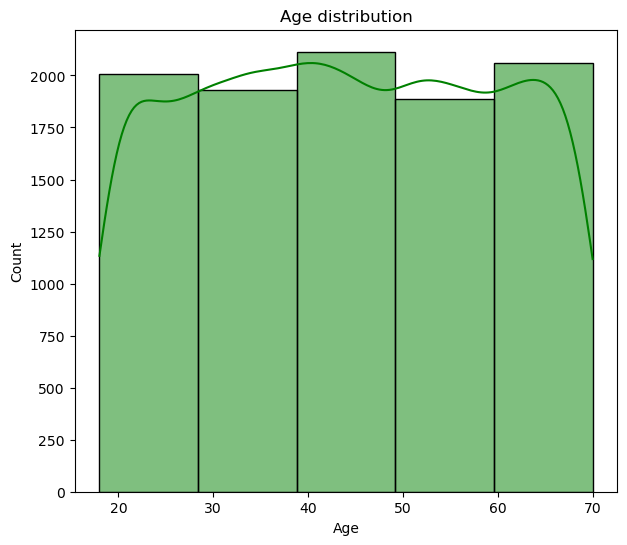

In [143]:
# visualize age distribution
plt.figure(figsize=(7, 6))
sns.histplot(data=df, x='Age', bins=5, kde=True, color='green')
plt.title('Age distribution')
plt.show()

- The higher age range spans between the 40s and 50s.

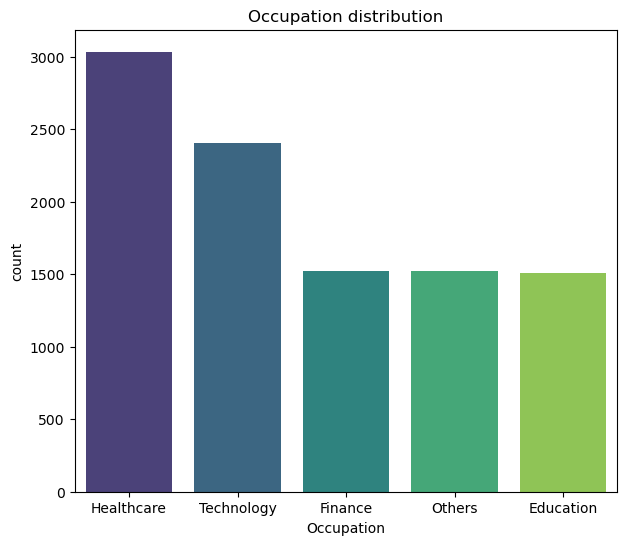

In [50]:
# visualize occupation distribution
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index, palette='viridis')
plt.title('Occupation distribution')
plt.show()

- Healthcare occupations are ranked first, followed by technology in the second position, and finance, other occupations, and education approximately share the third rank.

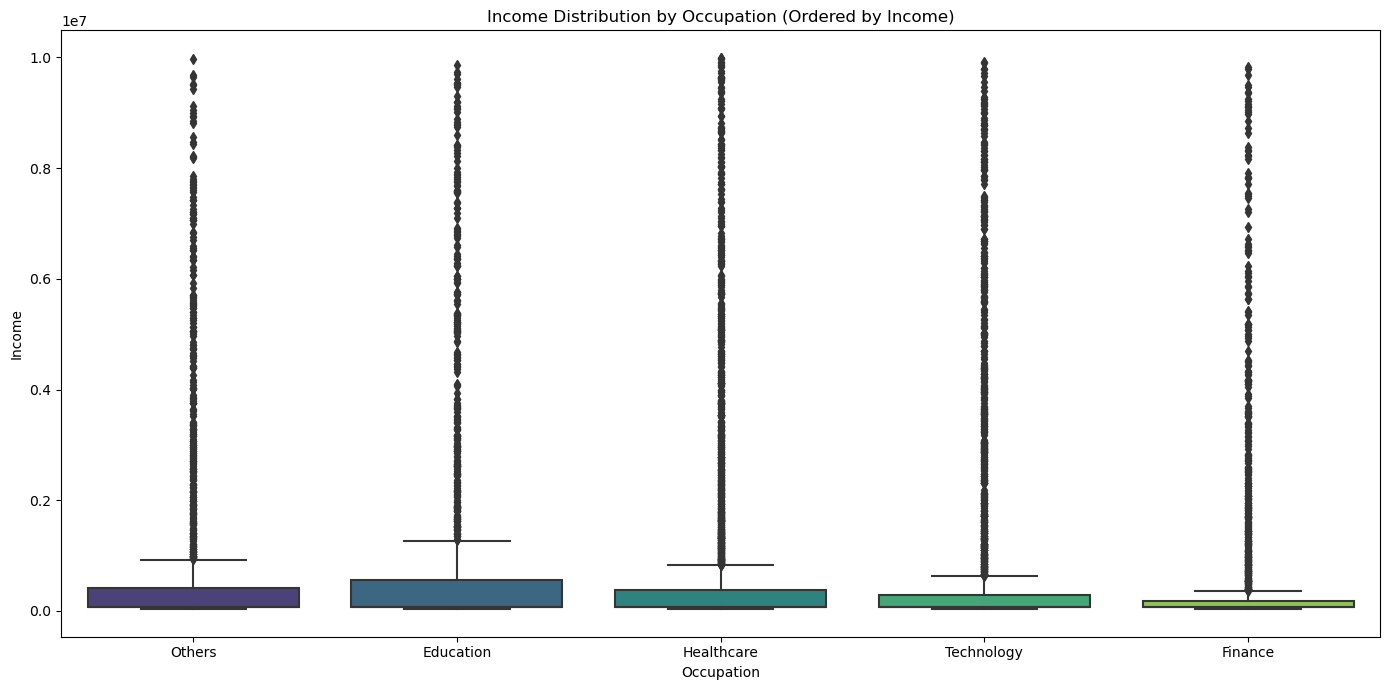

In [59]:
# visualize income by occupation
occupation_income_median = df.groupby('Occupation')['Income'].median().sort_values(ascending=False)
occupation_order = occupation_income_median.index
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Occupation', y='Income', order=occupation_order, palette='viridis')
plt.title('Income Distribution by Occupation (Ordered by Income)')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

- Income for other occupations is the highest one then the Income in the education sector is higher than in healthcare, with technology and finance occupying the lower ranks.

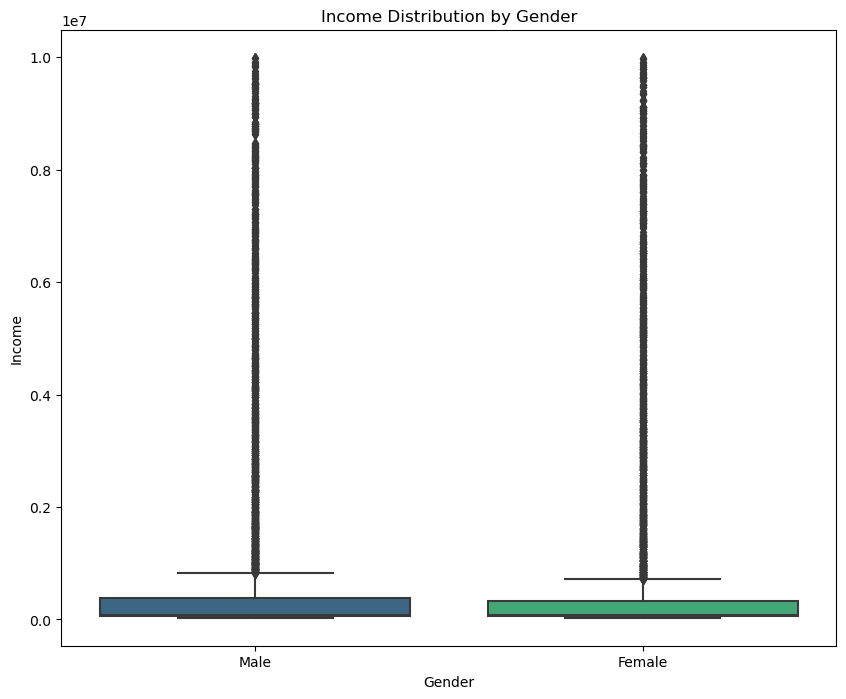

In [70]:
# visualize income by gender
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Gender', y='Income', palette='viridis')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

- Incomes are higher for males compared to females.

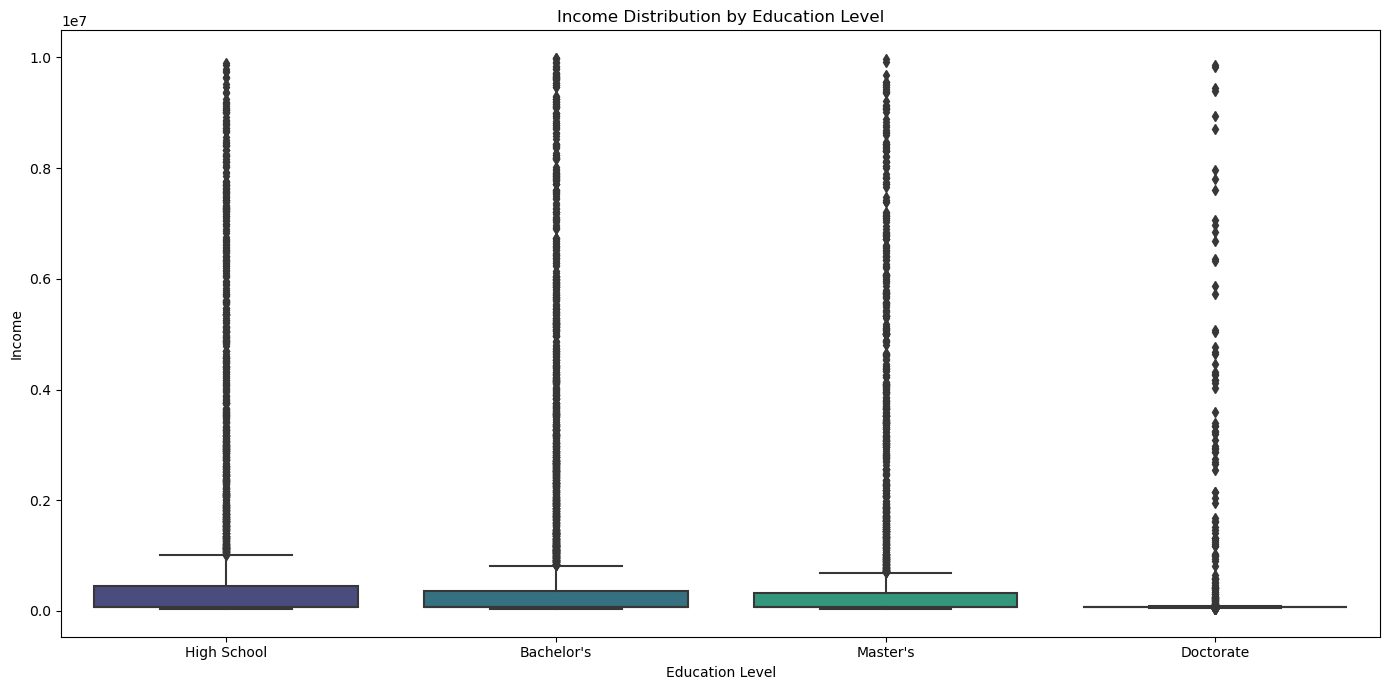

In [75]:
# visualize income by education level
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Education_Level', y='Income', order=['High School', "Bachelor's", "Master's", 'Doctorate'], palette='viridis')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

- Income is higher for individuals with a high school education level. Additionally, regarding the previous plot showing income by occupation, other occupations not mentioned in the top rank could include fields like electricians, bakers, and chefs. In the IT sector, it's notable that many individuals without a college degree have well-paying jobs. Following this, those with bachelor's degrees are ranked second, followed by master's degrees in the third rank, with doctorate holders having the fewest representatives in the dataset.

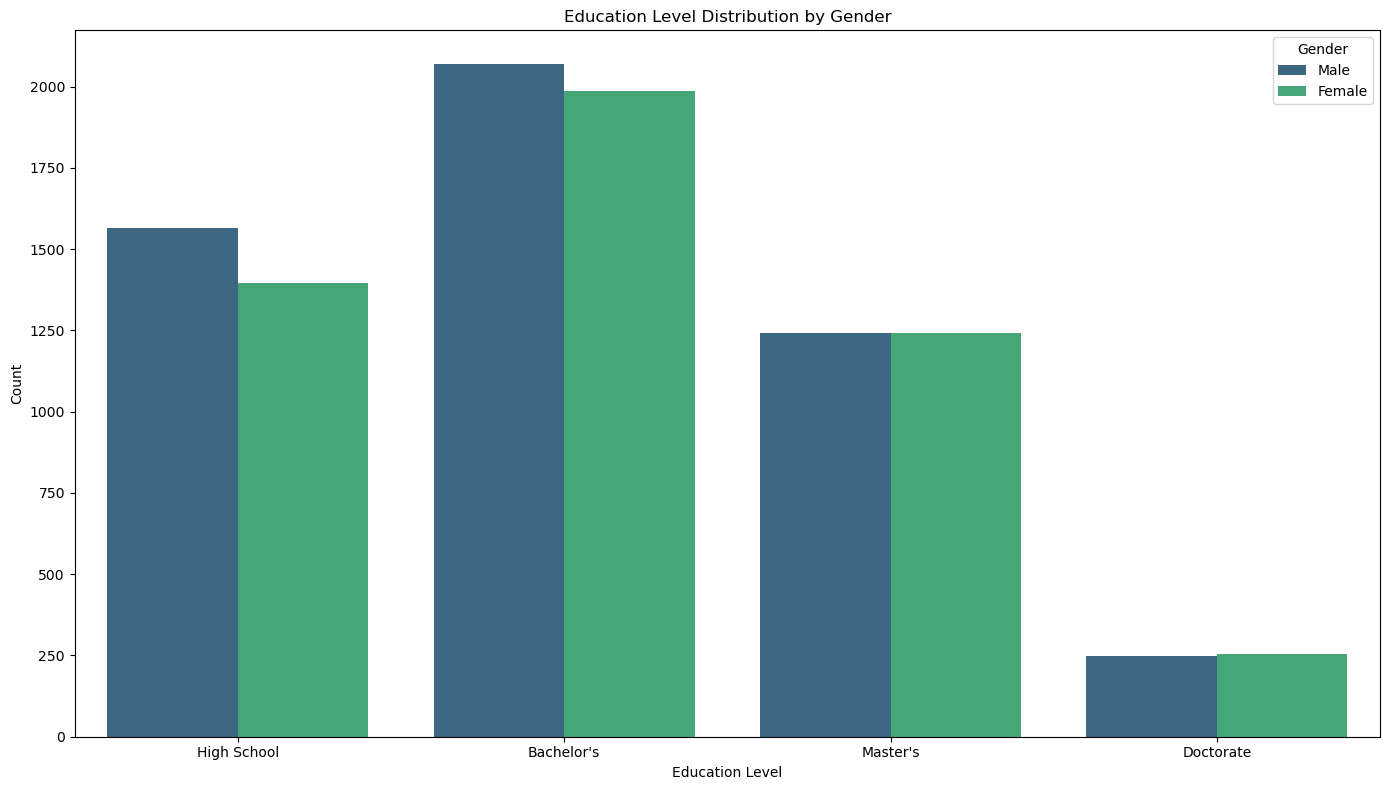

In [77]:
# visualize education level by gender
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Education_Level', hue='Gender', palette='viridis', order=['High School', "Bachelor's", "Master's", 'Doctorate'])
plt.title('Education Level Distribution by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

- More males have high school diplomas and bachelor's degrees compared to females. At the master's level, the numbers are equal between genders. Females outnumber males among those with doctorates.

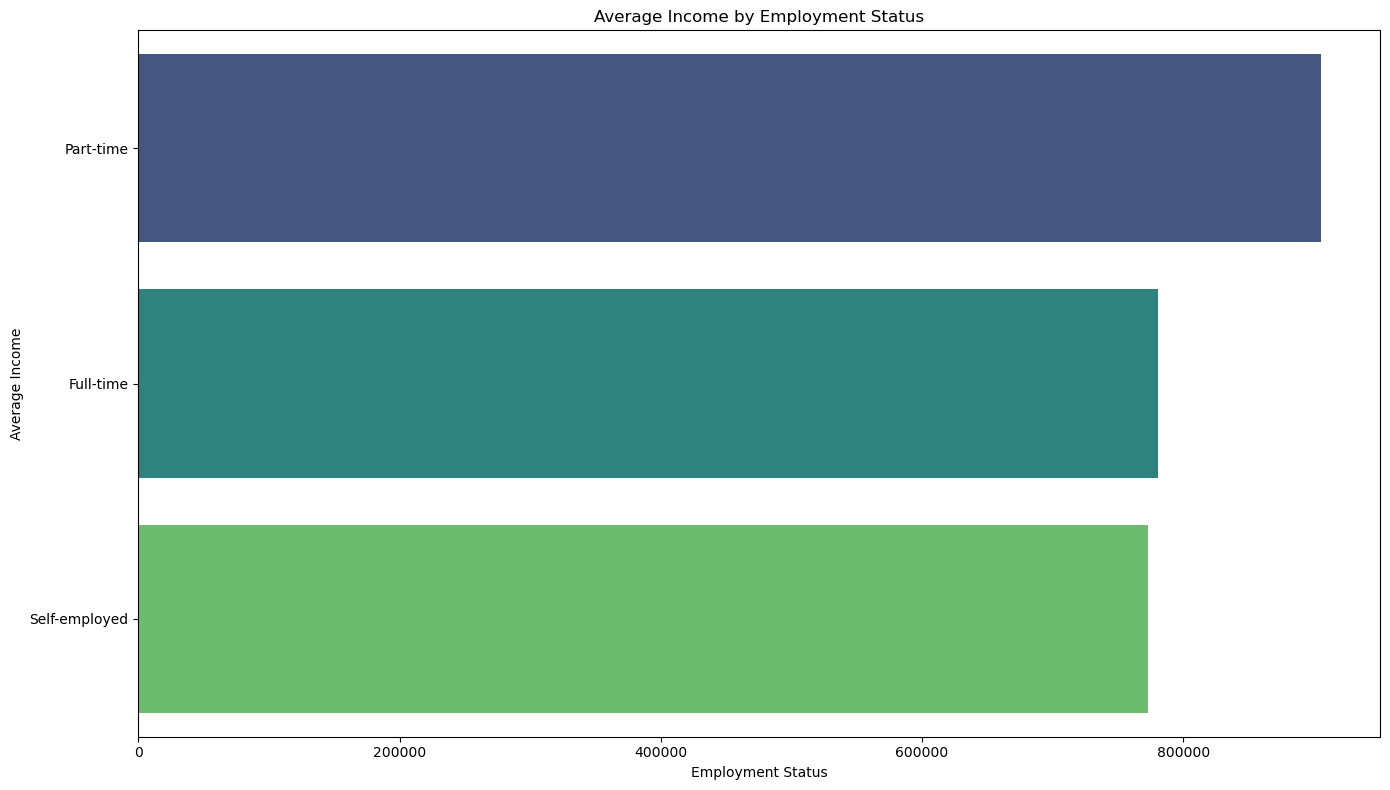

In [99]:
# visualize income by employment status
plt.figure(figsize=(14, 8))
avg_income = df.groupby('Employment_Status')['Income'].mean().sort_values(ascending=False)
sns.barplot(y=avg_income.index, x=avg_income.values, palette='viridis')
plt.title('Average Income by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()


- We observe that individuals working part-time have higher income compared to those working full-time. This could be due to the possibility of working multiple part-time jobs, such as freelancing, which may contribute to higher income levels. Additionally, full-time employees generally have higher income than self-employed individuals.

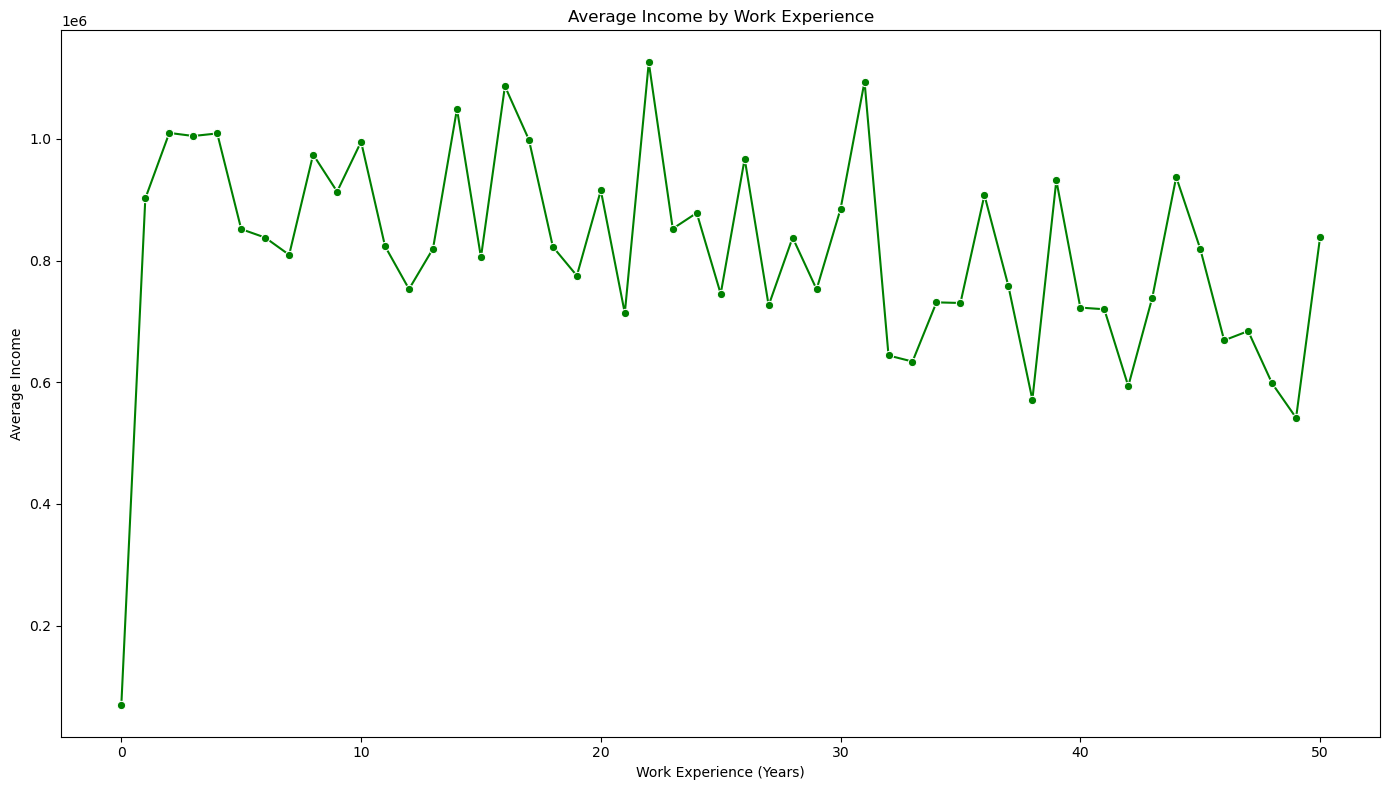

In [116]:
# visualize average income by work experience
plt.figure(figsize=(14, 8))
avg_income_by_experience = df.groupby('Work_Experience')['Income'].mean()
sns.lineplot(x=avg_income_by_experience.index, y=avg_income_by_experience.values, color='green', marker='o')
plt.title('Average Income by Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()

- Individuals with higher work experience tend to have higher incomes, particularly those with 20 to 30 years of experience.

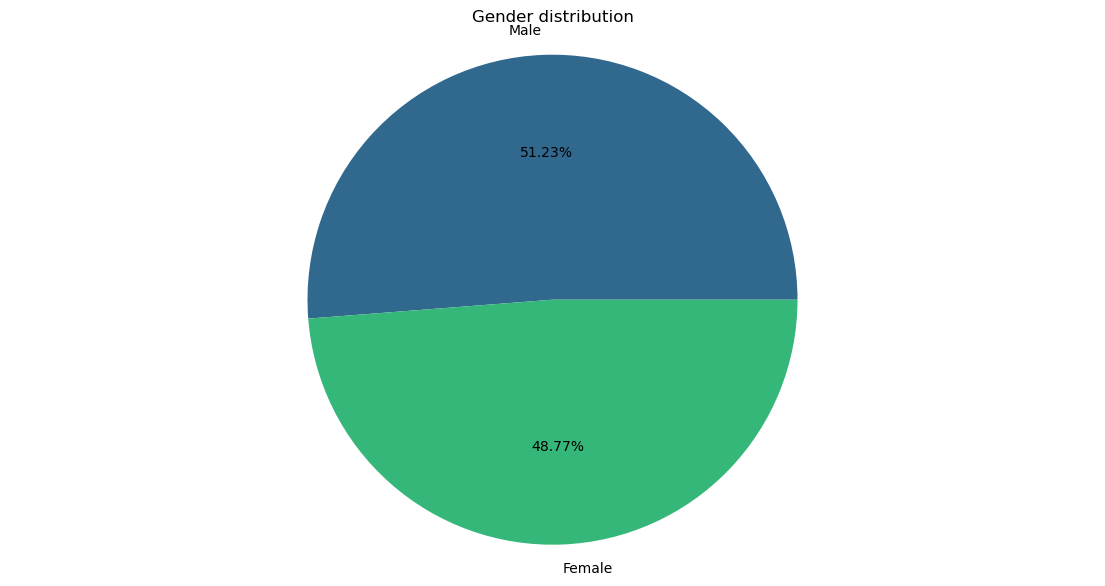

In [125]:
# visualize gender distribution
df_by_gender = df['Gender'].value_counts().reset_index()
df_by_gender.columns = ['Gender', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_gender['Count'], labels=df_by_gender['Gender'], autopct='%1.2f%%', colors=sns.color_palette('viridis', n_colors=2))
plt.title('Gender distribution')
plt.axis('equal')
plt.show()

- The percentage of male is higher than the female

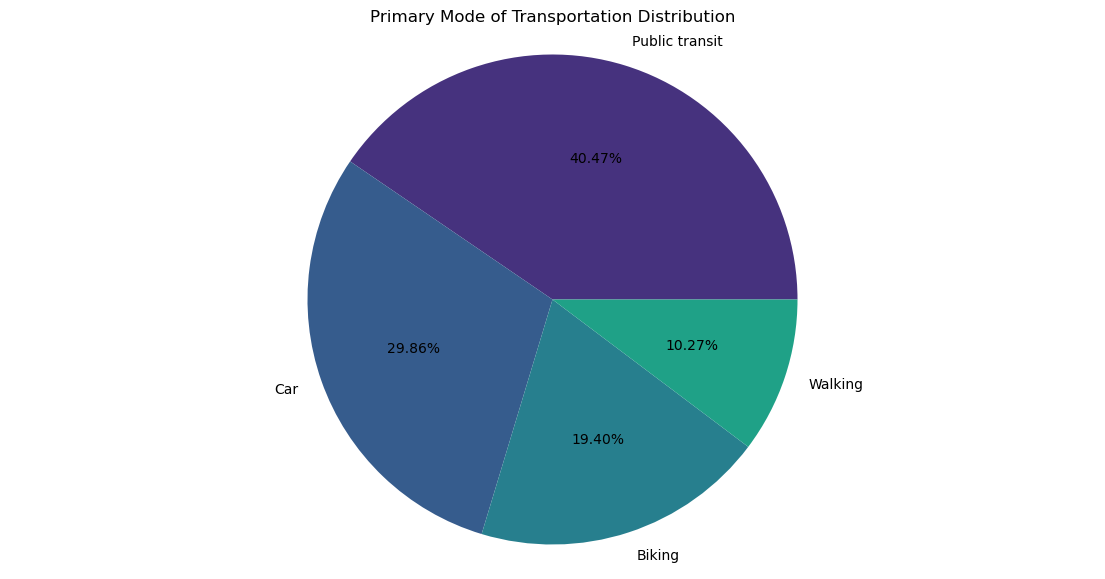

In [185]:
# visualize mode of transportation distribution
df_by_trans = df['Primary_Mode_of_Transportation'].value_counts().reset_index()
df_by_trans.columns = ['Primary_Mode_of_Transportation', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_trans['Count'], labels=df_by_trans['Primary_Mode_of_Transportation'], autopct='%1.2f%%', colors=sns.color_palette('viridis'))
plt.title('Primary Mode of Transportation Distribution')
plt.axis('equal')
plt.show()

- The majority of people use public transportation, accounting for 40.47%, followed by those who use cars at 29.86%. Biking represents 19.40%, and walking is the least common mode of transportation at 10.27%.

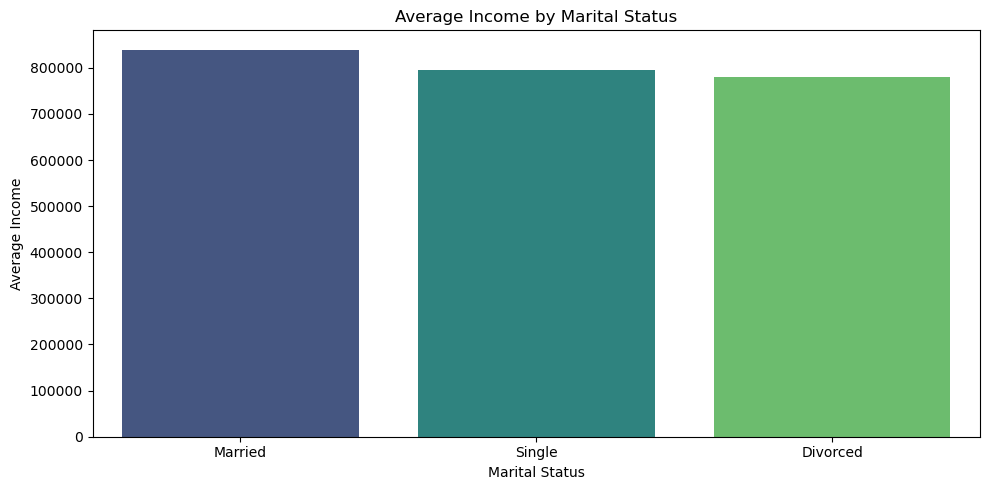

In [142]:
# visualize average income by marital status
plt.figure(figsize=(10, 5))
avg_income_by_status = df.groupby('Marital_Status')['Income'].mean().sort_values(ascending=False)
sns.barplot(x=avg_income_by_status.index, y=avg_income_by_status.values, palette='viridis')
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()

- We can see that higher incomes are more common among married people, while those who are divorced tend to have lower incomes. This suggests that income might be influenced by whether someone is divorced or married.

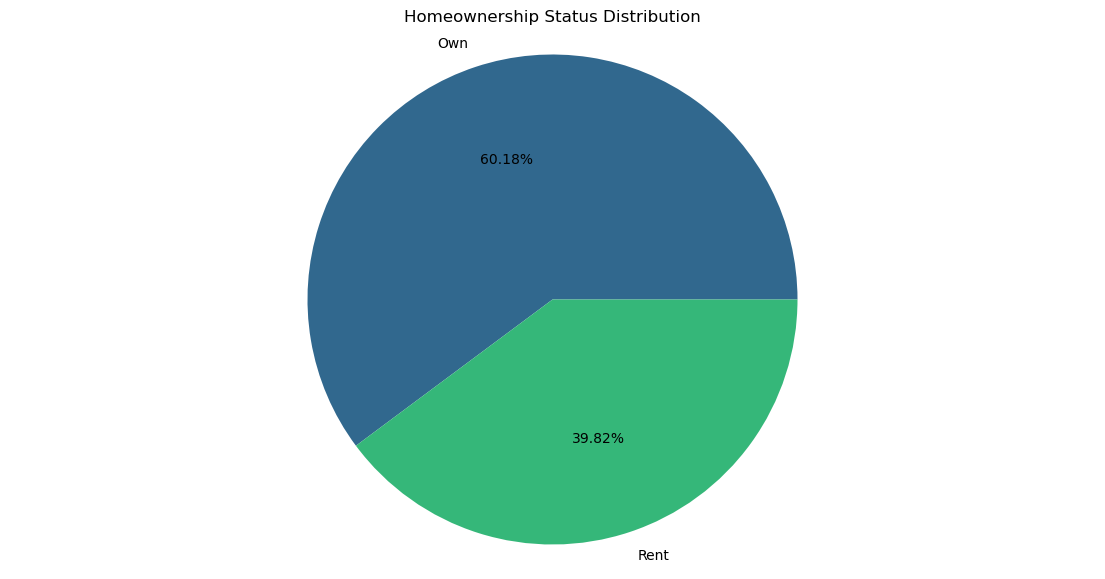

In [154]:
# visualize homeownership distribution
df_by_own = df['Homeownership_Status'].value_counts().reset_index()
df_by_own.columns = ['Homeownership_Status', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_own['Count'], labels=df_by_own['Homeownership_Status'], autopct='%1.2f%%', colors=sns.color_palette('viridis', n_colors=2))
plt.title('Homeownership Status Distribution')
plt.axis('equal')
plt.show()

- 60.18% of individuals own their homes, while 39.82% are renting homes.

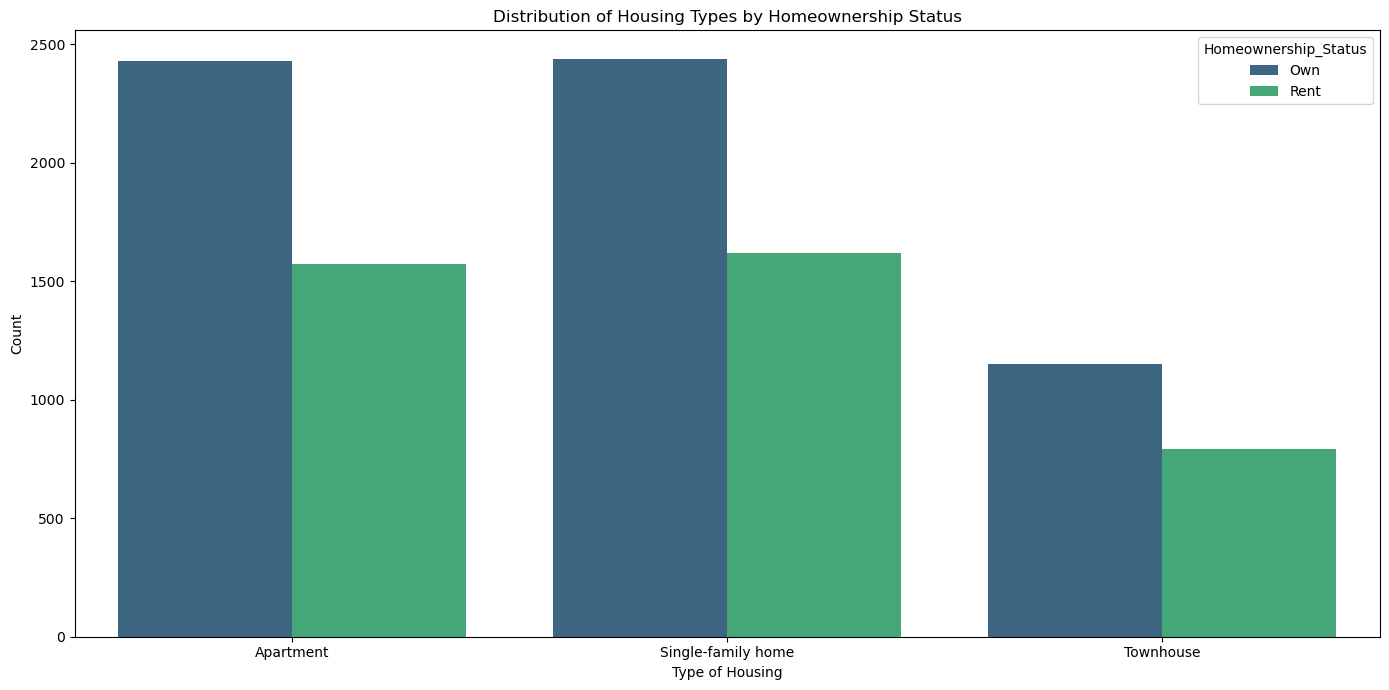

In [183]:
# visualize Distribution of Housing Types by Homeownership Status
plt.figure(figsize=(14, 7))
sns.countplot(x='Type_of_Housing', data=df, hue='Homeownership_Status', palette='viridis')
plt.title('Distribution of Housing Types by Homeownership Status')
plt.xlabel('Type of Housing')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

- The majority of homeowners reside in apartments and single-family homes, with fewer opting for townhouses. This difference could be because townhouses tend to be more expensive to buy, making them less accessible or attractive to potential homeowners.

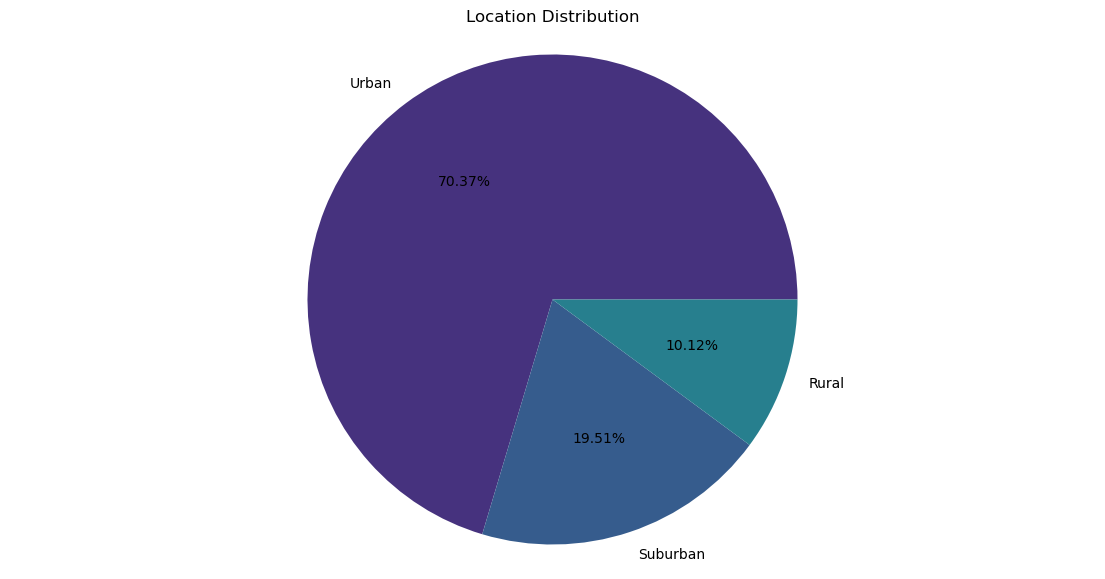

In [189]:
# visualize location distribution
df_by_loc = df['Location'].value_counts().reset_index()
df_by_loc.columns = ['Location', 'Count']
plt.figure(figsize=(14, 7))
plt.pie(df_by_loc['Count'], labels=df_by_loc['Location'], autopct='%1.2f%%', colors=sns.color_palette('viridis'))
plt.title('Location Distribution')
plt.axis('equal')
plt.show()

- 70.37% of people live in urban areas, 19.51% in suburban areas, and 10.12% in rural areas. Those who choose suburban and rural areas may do so because they prefer the lower cost of living and enjoy being closer to nature. Meanwhile, those who opt for urban areas often prioritize access to job opportunities, a vibrant lifestyle, and extensive infrastructure and amenities.

In [23]:
# create new feature by taking the logarithm of the income
df['Income_Log'] = np.log1p(df['Income'])
# features
X = df.drop(['Income', 'Income_Log'], axis=1)
#target variable
y = df['Income_Log']
# preprocess numerical and categorical features
num_features = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_transform = Pipeline(steps=[
    ('scale', StandardScaler())
])
cat_transform = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_features),
        ('cat', cat_transform, cat_features)
    ]
)
#preprocess data
X_p = preprocessor.fit_transform(X)
#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.2, random_state=42)

In [47]:
# define models for prediction
models= {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0),
    'LGBMRegressor': LGBMRegressor()
}
# get the performance of models
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_performance[model_name] = mse
best_score = min(model_performance.values())
print()
print(model_performance)
print()
# print the model with better performance
best_model = [name for name, score in model_performance.items() if score == best_score]
print(f'best model {best_model} : {best_score}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 33
[LightGBM] [Info] Start training from score 12.051447

{'Linear Regression': 2.266372426778329, 'Decision Tree': 3.760801982594962, 'Random Forest': 1.827001024692886, 'Support Vector Machine': 2.5348713542729095, 'Gradient Boosting': 2.1738962194490794, 'XGBRegressor': 2.3640003280367967, 'CatBoostRegressor': 2.0523161499478273, 'LGBMRegressor': 2.0606401799167577}

best model ['Random Forest'] : 1.827001024692886


In [28]:
#hyper tuning the best model which is Random forest
param_grid = {
    'n_estimators': randint(100, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}
# use randomized search
random_search = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print('best parameters found: ', best_params)

best parameters found:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 199}


In [29]:
# evaluate the model and use best parameters found for training
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
# calculate the mean squared error
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'final mse: {final_mse}')
print(f'final rmse: {final_rmse}')

final mse: 1.8050884771582996
final rmse: 1.3435358116396823


In [43]:
# combine categorical and numerical features together
feature_names = num_features + cat_features
# retrieve feature importances from the final model
feature_importances = final_model.feature_importances_
# Combine feature names and importances, then sort by importance
feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse=True)
# Print top feature importances
print("Top Feature Importances:\n")
for importance, feature_name in feature_importances_sorted[:10]:
    print(f"{feature_name}: {importance}")

Top Feature Importances:

Work_Experience: 0.1872961908984831
Age: 0.1447566463816801
Number_of_Dependents: 0.08568658282758035
Household_Size: 0.07589687546577746
Location: 0.026506847208664905
Homeownership_Status: 0.026412542224427134
Primary_Mode_of_Transportation: 0.02481867658137659
Type_of_Housing: 0.022848350458482547
Employment_Status: 0.021700390996829057
Marital_Status: 0.02052649020419034


- People with more work experience tend to earn higher incomes.
- Older people generally earn more compared to younger people.
- Having fewer dependents is associated with higher incomes.
- Larger households tend to have slightly lower incomes.
- Where you live can impact how much you earn.
- Whether you own or rent your home affects income levels.
- How you get to work influences your income.
- The kind of home you live in matters but has a smaller effect.
- Being employed full-time typically leads to higher incomes.
- Married people often have higher combined incomes compared to singles.

We will retrain the model using stacking regressor with 3 models that have the best performance and use randomized search to get best parameters for each model so finally we get a better prediction

In [50]:
# Define parameter distributions for RandomForestRegressor
param_dist_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Define parameter distributions for CatBoostRegressor
param_dist_catboost = {
    'iterations': randint(50, 300),
    'depth': randint(4, 10),
    'learning_rate': [0.1, 0.05, 0.01],
    'l2_leaf_reg': [3, 5, 7]
}

# Define parameter distributions for LGBMRegressor
param_dist_lgbm = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, -1],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': randint(20, 50)
}

# Create RandomizedSearchCV instances for each base estimator
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist_rf, n_iter=100, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
catboost_random_search = RandomizedSearchCV(CatBoostRegressor(silent=True, random_state=42), param_distributions=param_dist_catboost, n_iter=100, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
lgbm_random_search = RandomizedSearchCV(LGBMRegressor(random_state=42), param_distributions=param_dist_lgbm, n_iter=100, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV for each estimator
rf_random_search.fit(X_train, y_train)
catboost_random_search.fit(X_train, y_train)
lgbm_random_search.fit(X_train, y_train)

# Get best estimators from RandomizedSearchCV
best_rf = rf_random_search.best_estimator_
best_catboost = catboost_random_search.best_estimator_
best_lgbm = lgbm_random_search.best_estimator_

# Define the tuned estimators
tuned_estimators = [
    ('rf', best_rf),
    ('catboost', best_catboost),
    ('lgbm', best_lgbm)
]

# Define the stacking model with tuned estimators
stacking_model = StackingRegressor(estimators=tuned_estimators, final_estimator=LinearRegression())

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model on the test set
y_stacking_pred = stacking_model.predict(X_test)
stacking_mse = mean_squared_error(y_test, y_stacking_pred)
stacking_rmse = mean_squared_error(y_test, y_stacking_pred, squared=False)
print()
print(f'Final MSE with Stacking: {stacking_mse}')
print(f'Final RMSE with Stacking: {stacking_rmse}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 33
[LightGBM] [Info] Start training from score 12.051447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 33
[LightGBM] [Info] Start training from score 12.051447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

With an RMSE around 1.32, the model is performing well in predicting household income.